1. Повнозв'язані нейронні мережі

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import os
import re
import string
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [94]:
df = pd.read_csv("milknew.csv") #https://www.kaggle.com/datasets/cpluzshrijayan/milkquality
print(df.shape)
df.head()

(1059, 8)


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [95]:
df["Grade"] = df["Grade"].map({'low': 0, 'medium': 1, 'high': 2})
df.to_csv('milk.csv', index=False)
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [96]:
# from csv to arrays
data = 'milk.csv'

x = []
y = []
with open(data) as d:
    for i, line in enumerate(d):
        if i == 0:
            print('labels:', line.strip())
            continue
        fields = line.strip().split(',')
        x.append([float(n) for n in fields[:-1]])
        y.append([int(fields[-1])])
        if i == 1:
          print(f'features: {x[0]}\ntarget: {y[0]}')

x = np.array(x, dtype='float32')
y = np.array(y, dtype='uint8')
print('features shape:', x.shape)
print('targets shape:', y.shape)

labels: pH,Temprature,Taste,Odor,Fat ,Turbidity,Colour,Grade
features: [6.6, 35.0, 1.0, 0.0, 1.0, 0.0, 254.0]
target: [2]
features shape: (1059, 7)
targets shape: (1059, 1)


In [97]:
# train and test
x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.2)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print('train number:', len(x_train))
print('test number:', len(x_test))
print('input shape: ', x_train.shape[1])

train number: 847
test number: 212
input shape:  7


In [104]:
# built the model
model =  keras.Sequential()

model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# train the model
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2,
                    shuffle = True,
                    verbose = 2)

Epoch 1/20
11/11 - 3s - loss: 0.5911 - accuracy: 0.4357 - val_loss: 0.4952 - val_accuracy: 0.5588 - 3s/epoch - 285ms/step
Epoch 2/20
11/11 - 0s - loss: 0.0615 - accuracy: 0.4919 - val_loss: 0.3905 - val_accuracy: 0.6000 - 109ms/epoch - 10ms/step
Epoch 3/20
11/11 - 0s - loss: -3.4705e-01 - accuracy: 0.5510 - val_loss: 0.2694 - val_accuracy: 0.6235 - 123ms/epoch - 11ms/step
Epoch 4/20
11/11 - 0s - loss: -5.8705e-01 - accuracy: 0.5524 - val_loss: 0.1322 - val_accuracy: 0.6471 - 98ms/epoch - 9ms/step
Epoch 5/20
11/11 - 0s - loss: -8.9086e-01 - accuracy: 0.5628 - val_loss: -9.3181e-03 - val_accuracy: 0.7059 - 109ms/epoch - 10ms/step
Epoch 6/20
11/11 - 0s - loss: -1.3932e+00 - accuracy: 0.5894 - val_loss: -1.8128e-01 - val_accuracy: 0.7059 - 105ms/epoch - 10ms/step
Epoch 7/20
11/11 - 0s - loss: -1.5852e+00 - accuracy: 0.5849 - val_loss: -3.6400e-01 - val_accuracy: 0.7059 - 105ms/epoch - 10ms/step
Epoch 8/20
11/11 - 0s - loss: -2.0401e+00 - accuracy: 0.5805 - val_loss: -5.5002e-01 - val_accur

In [105]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 64)                512       
                                                                 
 batch_normalization_18 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_26 (Dropout)        (None, 64)                0         
                                                                 
 dense_51 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_19 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_27 (Dropout)        (None, 128)             

<ipython-input-106-787eb35b2804>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, "bo", label="Training loss", color = 'm')
<ipython-input-106-787eb35b2804>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, "b", label="Validation loss", color = 'm')


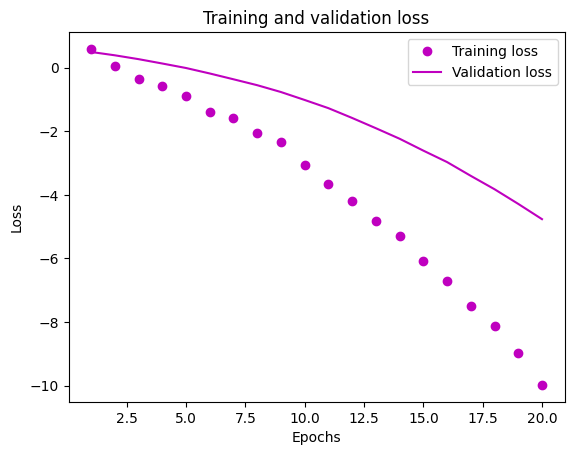

In [106]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss", color = 'm')
plt.plot(epochs, val_loss_values, "b", label="Validation loss", color = 'm')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [107]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: -6.29250431060791
Test accuracy: 0.75


lab1
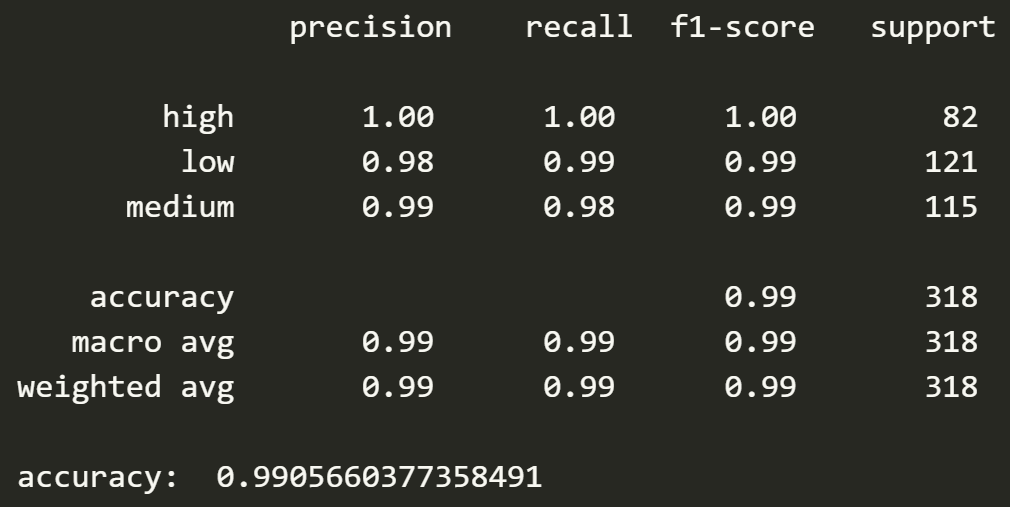

2. Згорткові нейронні мережі

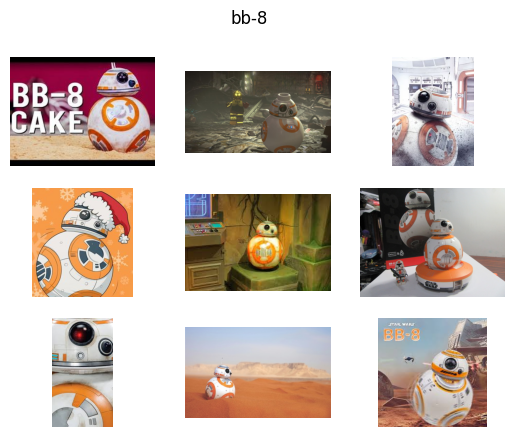

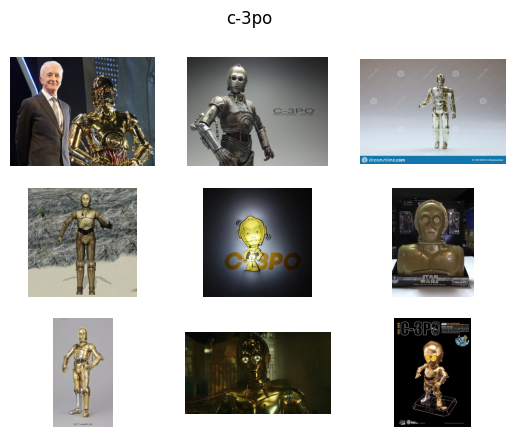

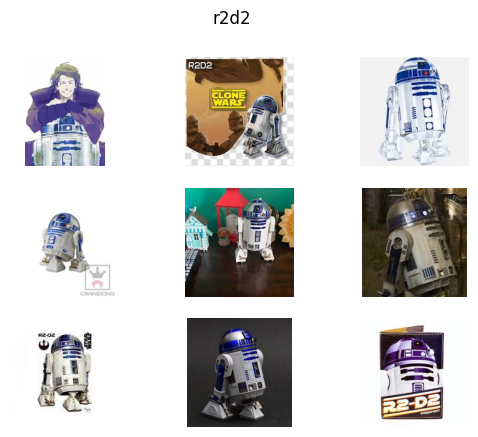

In [212]:
path = 'star_wars/' #https://www.kaggle.com/datasets/at081028/starwars-images
categories = ['bb-8', 'c-3po', 'r2d2']
num_classes = 3

# display images
for category in categories:
    fig, axs = plt.subplots(3, 3)
    fig.suptitle(category)
    for n, f_name in enumerate(os.listdir(path + category)[:9]):
        img = plt.imread(path + category + '/' + f_name)
        axs[n // 3, n % 3].imshow(img)
        axs[n // 3, n % 3].axis('off')
    plt.show()

In [223]:
x, y = [], []

# preprocess images
for n, category in enumerate(categories):
    for f in os.listdir(path + category):
        image_path = path + category + '/' + f
        image = cv2.imread(image_path)
        try:
          image = cv2.resize(image, (30, 50))
          image = image / 255.0
          x.append(image)
          y.append(n)
        except:
          pass

# train and test
x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.2)

# convert vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)

print('x_train shape:', x_train.shape)
print('train number:', x_train.shape[0])
print('test number:', x_test.shape[0])

x_train shape: (588, 50, 30, 3)
train number: 588
test number: 147


In [224]:
# build the model
model = keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(50, 30, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 48, 28, 32)        896       
                                                                 
 max_pooling2d_65 (MaxPooli  (None, 24, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_66 (Conv2D)          (None, 22, 12, 64)        18496     
                                                                 
 max_pooling2d_66 (MaxPooli  (None, 11, 6, 64)         0         
 ng2D)                                                           
                                                                 
 flatten_35 (Flatten)        (None, 4224)              0         
                                                                 
 dropout_49 (Dropout)        (None, 4224)            

In [225]:
# train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
19/19 [==============================] - 2s 47ms/step - loss: 1.0707 - accuracy: 0.4354
Epoch 2/20
19/19 [==============================] - 1s 46ms/step - loss: 0.8915 - accuracy: 0.5969
Epoch 3/20
19/19 [==============================] - 1s 46ms/step - loss: 0.7174 - accuracy: 0.7143
Epoch 4/20
19/19 [==============================] - 1s 46ms/step - loss: 0.6385 - accuracy: 0.7500
Epoch 5/20
19/19 [==============================] - 1s 76ms/step - loss: 0.5532 - accuracy: 0.7908
Epoch 6/20
19/19 [==============================] - 2s 79ms/step - loss: 0.5283 - accuracy: 0.7806
Epoch 7/20
19/19 [==============================] - 1s 77ms/step - loss: 0.4671 - accuracy: 0.8248
Epoch 8/20
19/19 [==============================] - 1s 57ms/step - loss: 0.4406 - accuracy: 0.8452
Epoch 9/20
19/19 [==============================] - 1s 47ms/step - loss: 0.3789 - accuracy: 0.8724
Epoch 10/20
19/19 [==============================] - 1s 47ms/step - loss: 0.3398 - accuracy: 0.8929
Epoch 11/

<ipython-input-227-bcc42a04055e>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, "bo", label="Training loss", color = 'olive')


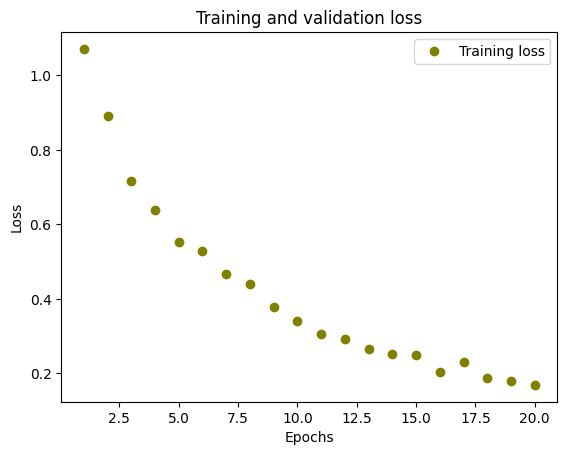

In [227]:
history_dict = history.history
loss_values = history_dict["loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss", color = 'olive')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [226]:
# evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.36987268924713135
Test accuracy: 0.8707482814788818


3. Рекурентні нейронні мережі

In [60]:
df = pd.read_csv('suicide.csv') # https://www.kaggle.com/datasets/aunanya875/suicidal-tweet-detection-dataset
df.dropna(inplace = True)
df['Suicide'] = LabelEncoder().fit_transform(df['Suicide'])

# data preprocessing
def clean_text(text):
   text = text.lower()
   text = re.sub("@\S+", " ", text)
   text = re.sub("https*\S+", " ", text)
   text = re.sub("#\S+", " ", text)
   text = re.sub("&quot", " ", text)
   text = re.sub("&\S+", " ", text)
   text = re.sub("â\S+", " ", text)
   text = re.sub("ð\S+", " ", text)
   text = re.sub("–", " ", text)
   text = re.sub("rt", " ", text)
   text = re.sub("\d", " ", text)
   text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
   text = re.sub('\n', ' ', text)
   text = re.sub('\s{2,}',' ', text)
   text = ' '.join([word for word in text.split(' ') if word not in stopwords.words("english")])
   return text

df['Tweet'] = df['Tweet'].apply(clean_text)

# train and test
x = df['Tweet']
y = df['Suicide']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('train number:', len(x_train))
print('test number:', len(x_test))

# tokenize data
token = Tokenizer()
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

print('x_train:', x_train[:5])

train number: 1428
test number: 357
x_train: [[81, 96, 46, 1503, 1504, 182, 34, 643, 110, 198, 111], [242, 1505, 97, 1506, 167, 505, 880, 1507, 1508, 1509, 1510, 1511, 112, 644], [219, 299, 506, 220, 507, 1512, 881, 36, 508, 221, 1513], [882, 6, 1514, 1515, 1516, 645, 132, 87], [1517, 3, 133, 25, 75, 76, 509, 274, 408, 883, 183, 510, 156, 3, 275, 4, 1, 884, 14, 276, 125, 98, 2, 45, 1518, 300, 346, 646, 511, 69, 23]]


In [61]:
# calc max sequence length
seq_len = [len(i) for i in x_train]
max_seq_len = int(np.ceil(np.mean(seq_len)))

# pad sequences to have uniform length
x_train = pad_sequences(x_train, maxlen=max_seq_len)
x_test = pad_sequences(x_test, maxlen=max_seq_len)

print('x_train shape:', x_train.shape)

# unique words in the vocabulary
total_words = len(token.word_index) + 1

model = keras.Sequential()
model.add(layers.Embedding(total_words, 32, input_length=max_seq_len))
model.add(layers.LSTM(10, dropout=0.2, recurrent_dropout=0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

x_train shape: (1428, 10)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 10, 32)            128288    
                                                                 
 lstm_10 (LSTM)              (None, 10)                1720      
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 130019 (507.89 KB)
Trainable params: 130019 (507.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
# train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
45/45 [==============================] - 6s 16ms/step - loss: 0.6633 - accuracy: 0.6310
Epoch 2/10
45/45 [==============================] - 1s 17ms/step - loss: 0.5409 - accuracy: 0.6884
Epoch 3/10
45/45 [==============================] - 1s 17ms/step - loss: 0.3675 - accuracy: 0.9020
Epoch 4/10
45/45 [==============================] - 1s 17ms/step - loss: 0.2157 - accuracy: 0.9559
Epoch 5/10
45/45 [==============================] - 1s 17ms/step - loss: 0.1473 - accuracy: 0.9713
Epoch 6/10
45/45 [==============================] - 1s 18ms/step - loss: 0.1017 - accuracy: 0.9783
Epoch 7/10
45/45 [==============================] - 1s 17ms/step - loss: 0.0807 - accuracy: 0.9839
Epoch 8/10
45/45 [==============================] - 1s 19ms/step - loss: 0.0645 - accuracy: 0.9895
Epoch 9/10
45/45 [==============================] - 1s 17ms/step - loss: 0.0502 - accuracy: 0.9930
Epoch 10/10
45/45 [==============================] - 1s 17ms/step - loss: 0.0417 - accuracy: 0.9930


<ipython-input-64-246b25773249>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, "bo", label="Training loss", color = 'c')


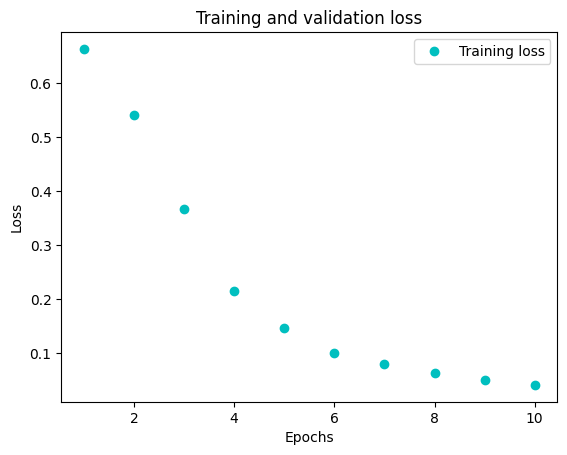

In [64]:
history_dict = history.history
loss_values = history_dict["loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss", color = 'c')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [63]:
# evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.26548928022384644
Test accuracy: 0.9159663915634155


lab2
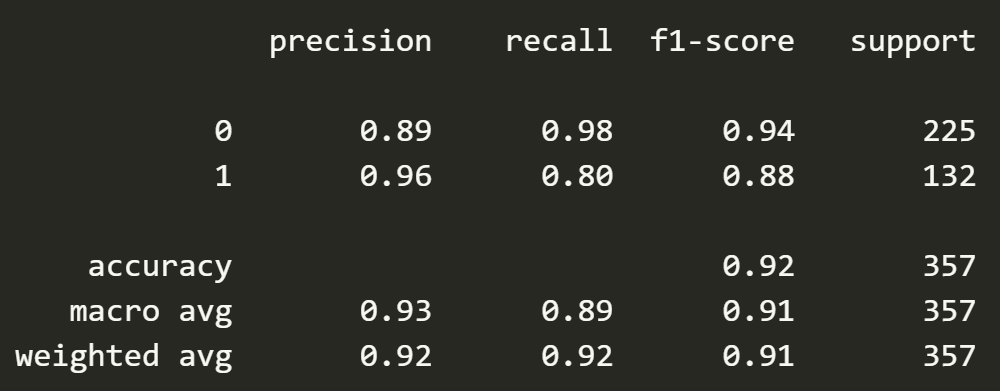